数据来源 [国家卫生健康委员会](http://www.nhc.gov.cn/xcs/yqtb/list_gzbd.shtml)

1月

日期 | 10日 | 11日| 12日 | 13日| 14日 | 15日| 16日 | 17日| 18日| 19日 | 20日| 21日 | 22日 | 23日 | 24日| 25日 | 26日| 27日 | 28日| 29日 | 30日| 31日
- | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-:| :-: | :-: | :-: | :-:| :-: | :-: | :-: | :-:| :-: | :-: | :-:| :-: |:-: |:-: 
确诊| 41 | 41 | 41 | 41 | 41 | 41 | 45 | 62 | 121 | 198 | 291 | 440 | 571 | 830 | 1287| 1975| 2744| 4515| 5974 | 7711 | 9692| 11791 |
重症|  7 |  7 |  6 |  6 | 6  | 5  |  5 |  8 |  -  |  35 | -   | 102 | 95  | 177 | 237 | 324 | 461 | 976 | 1239 | 1370 | 1527| 1795|
死亡|  1 |  1 |  1 |  1 | 1  | 2  |  2 |  2 |  -  |   3 | -   | 9   | 17  | 25  | 41  | 56  | 80  | 106 | 132  | 170| 213| 259 |
治愈|  2 |  6 |  7 |  7 | 7  | 12 | 15 | 19 | 24  |  25 | -   | -   | -   | -   | 38  | 49  | 51  |  60 | 103  | 124 | 171| 243|
疑似|  - |  - |  - |  - |  - |  - |  - |  - |  -  |   - |11+43|?+37 | 393 | 1072| 1965| 2684| 5794| 6973| 9239 | 12167| 15238| 17988 |
密切|739 |763 |763 |763 |763 |763 | 763| 763|  -  | 817 | 1739| 2197| 5897| 9507|15197|23431|32799|47833| 65537| 88693| 113579 | 136987 |
解除| 0  | 46 | 76 |187 |450 |644 | 665| 681|  -  | 727 | 817 | 765 | 969 | 1087|1230 | 1875| 2346| 3701| 5547 | 6746| 11152 | 18509|


2月

日期 | 1日 | 2日| 3日 | 4日| 5日 | 6日| 7日 | 8日| 9日| 10日 | 11日| 12日 | 13日 | 14日 | 15日|
- | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-:| :-: | :-: | :-: | :-:| :-: | :-: | :-: | 
确诊| 14380 | 17205| 20438| 24324|28018 | 31161| 34546| 37198| 40171| 42638| 44653| 59804| 63851| 66492| 68500|
重症|  2110 | 2296 | 2788 |  3219| 3859 |  4821|  6101|  6188|  6484|  7333|  8204|  8030| 10204| 11053| 11272|
死亡|  304  | 361  | 425  |   490| 563  |   636|   722|   811|   908|  1016|  1113|  1367|  1380|  1523|  1665|
治愈|  328  | 475  | 632  |   892|1153  |  1540|  2050|  2649|  3281|  3996|  4740|  5911|  6723|  8096|  9419|
疑似| 19544 | 21558| 23214| 23260|24702 | 26359| 27657| 28942| 23589| 21675| 16067| 13435| 10109|  8969|  8228|
密切|163844 |189583|221015|252154|282813|314028|345498|371905|399487|428438|451462|471531|493067|513183|529418|
解除| 26250 | 36883| 49686| 66599|96459 |127983|155838|183722|211969|240710|266425|290145|315083|344144|370654|


日期 | 16日 | 17日| 18日 | 19日| 20日 | 21日| 22日 | 23日| 24日| 25日 | 26日| 27日 | 28日 | 29日 |
- | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-:| :-: | :-: | :-: | :-:| :-: | :-: | 
确诊|70548 | 72436| 74185| 74576(75002)| 75465| 76288| 76936| 77150| 77658| 78064| 78497| 78824| 79251| 79824|
重症|10644 | 11741| 11977| 11864       | 11633| 11477| 10968|  9915|  9126|  8752|  8346|  7952|  7664|  7365|
死亡| 1770 |  1868|  2004|  2118       |  2236|  2345|  2442|  2592|  2663|  2715|  2744|  2788|  2835|  2870|
治愈|10844 | 12552| 14376| 16155       | 18264| 20659| 22888| 24734| 27323| 29745| 32495| 36117| 39002| 41625|
疑似| 7264 |  6242|  5248|  4922       |  5206|  5365|  4148|  3434|  2824|  2491|  2358|  2308|  1418|   851|
密切|546016|560901|574418|589163       |606037|618915|628517|635531|641742|647406|652174|656054|658587|660716|
解除|395477|419349|438537|462800       |485735|505351|522428|538050|553840|568298|580602|590829|600364|608860|


19日核减加回

3月

日期 | 1日 | 2日| 3日 | 4日| 5日 | 6日| 7日 | 8日| 9日| 10日 | 11日| 12日 | 13日 | 14日 | 15日|
- | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-:| :-: | :-: | :-: | :-:| :-: | :-: | :-: | 
确诊| 80026| 80151| 80270| 80409| 80552| 80651| 80695| 80735| 80754| 80778| 80793| 80813| 80824| 80844| 80860|
重症|  7110|  6806|  6416|  5952|  5737|  5489|  5264|  5111|  4794|  4492|  4257|  4020|  3610|  3226|  3032|
死亡|  2912|  2943|  2981|  3012|  3042|  3070|  3097|  3119|  3136|  3158|  3169|  3176|  3189|  3199|  3213|
治愈| 33757| 47204| 49856| 52045| 53726| 55404| 57065| 58600| 59897| 61475| 62793| 64111| 65541| 66911| 67749|
疑似|   715|   587|   520|   522|   482|   502|   458|   421|   349|   285|   253|   147|   115|   113|   134|
密切|663240|664899|666397|669025|670854|672458|674038|674760|675338|675886|677243|678088|678935|679759|680462|
解除|617021|624248|629965|636155|640958|645728|650964|654614|658356|661279|663542|665927|668056|669570|670880|




日期 | 16日 | 17日| 18日 | 19日| 20日 | 21日| 22日 | 23日| 24日| 25日 | 26日| 27日 | 28日 | 29日 | 30日| 31日|
- | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-:| :-: | :-: | :-: | :-:| :-: | :-: | :-: |  :-: | 
确诊| 80881| 80894| 80928| 80967| 81008| 81054| 81093| 81171| 81218| 81285| 81340| 81394| 81439| 81470| 81518| 81554|
重症|  2830|  2622|  2314|  2136|  1963|  1845|  1749|  1573|  1399|  1235|  1034|   921|   742|   633|   528|466|
死亡|  3226|  3237|  3245|  3248|  3255|  3261|  3270|  3277|  3281|  3287|  3292|  3295|  3300|  3304| 3305|3312|
治愈| 68679| 69601| 70420| 71150| 71740| 72244| 72703| 73159| 73650| 74051| 74588| 74971| 75448| 75770| 76052| 76238|
疑似|   128|   119|   105|   104|   106|   118|   136|   132|   134|   159|   189|   184|   174|   168|   183|172|
密切|681404|682327|683281|684331|685866|687680|688993|691185|693223|695305|697470|699396|701884|704190|706017|707913|
解除|672053|673105|674137|675342|676495|677609|678292|679108|679867|680591|681465|682198|683303|684955|686164|687599|


4月

日期 | 1日 | 2日| 3日 | 4日| 5日 | 6日| 7日 | 8日| 9日| 10日 | 11日| 12日 | 13日 | 14日 | 15日|
- | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-:| :-: | :-: | :-: | :-:| :-: | :-: | :-: | 
确诊| 81589| 81620| 81639| 81669| 81708| 81740| 81802| 81865| 81907| 81953| 82052| 82160| 82249| 82295| 82341|
重症|   429|   379|   331|   295|   265|   211|   189|   176|   144|   141|   139|   121|   116|   113|    95|
死亡|  3118|  3322|  3326|  3329|  3331|  3331|  3333|  3335|  3336|  3339|  3339|  3341|  3341|  3342|  3342|
治愈| 76408| 76571| 76751| 76964| 77078| 77167| 77279| 77370| 77455| 77525| 77575| 77663| 77738| 77816| 77892|
疑似|   153|   135|   114|   107|    88|    89|    83|    73|    53|    44|    82|    72|    72|    73|    63|
密切|709570|710985|712088|713110|713988|714720|715854|716889|717378|718050|718881|719908|720544|721295|722007|
解除|689498|691452|693802|695674|697844|700221|702520|704379|706202|707615|709159|710253|711932|712986|713523|


日期 | 16日 | 17日| 18日 | 19日| 20日 | 21日| 22日 | 23日| 24日| 25日 | 26日| 27日 | 28日 | 29日 | 30日|
- | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-:| :-: | :-: | :-: | :-:| :-: | :-: | :-: | 
确诊| 82367| 82719| 82735| 82747| 82758| 82788| 82798| 82804| 82816| 82827| 82830| 82836| 82858| 82862|  82874|
重症|    89|    85|    85|    81|    82|    78|    63|    57|    49|    51|    52|    50|    50|    41|     38|
死亡|  3342|  4632|  4632|  4632|  4632|  4632|  4632|  4632|  4632|  4632|  4633|  4633|  4633|  4633|   4633|
治愈| 77944| 77029| 77062| 77084| 77123| 77151| 77207| 77257| 77346| 77394| 77474| 77555| 77578| 77610|  77642|
疑似|    62|    63|    48|    43|    82|    35|    20|    20|    17|    12|    10|     9|    10|    10|      9|
密切|722909|723835|724850|725814|726797|727589|728049|728590|729287|729885|730529|731015|731910|732369| 732966|
解除|713939|714932|716218|717120|718006|718793|719620|720228|720794|721577|722086|723001|723627|724337| 725205|


5月

日期 | 1日 | 2日| 3日 | 4日| 5日 | 6日| 7日 | 8日| 9日| 10日 | 11日| 12日 | 13日 | 14日 | 15日|
- | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-:| :-: | :-: | :-: | :-:| :-: | :-: | :-: | 
确诊| 82875| 82877| 82880| 82881| 82883| 82885| 82886| 82887| 82901| 82918| 82919| 82926| 82929| 82933| 82941|
重症|    37|    34|    33|    29|    26|    23|    18|    15|    13|     9|    10|    10|     9|    11|    11|
死亡|  4633|  4633|  4633|  4633|  4633|  4633|  4633|  4633|  4633|  4633|  4633|  4633|  4633|  4633|  4633|
治愈| 77685| 77713| 77766| 77853| 77911| 77957| 77993| 78046| 78120| 78144| 78171| 78189| 78195| 78209| 78219|
疑似|    11|    10|     3|     2|     5|     4|     6|     8|     4|     3|     3|     4|     4|     4|     3|
密切|733733|734281|734766|735240|735577|735737|736010|736372|736787|737127|737599|737901|738262|738691|739278|
解除|725860|726742|727374|728088|728604|729200|729843|730513|730947|731626|732129|732584|732971|733480|734225|


日期 | 16日 | 17日| 18日 | 19日| 20日 | 21日| 22日 | 23日| 24日| 25日 | 26日| 27日 | 28日 | 29日 | 30日| 31 日
- | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-:| :-: | :-: | :-: | :-:| :-: | :-: | :-: |  :-: | 
确诊| 82947| 82954| 82960| 82965| 82967| 82971| 82971| 82974| 82985| 82992| - | 82995| 82995| 82999| 83001| 83017|
重症|    10|     8|    10|     9|     8|     8|     9|     8|     7|     7| - |     4|     4|     3|     3|     3|
死亡|  4634|  4634|  4634|  4634|  4634|  4634|  4634|  4634|  4634|  4634| - |  4634|  4634|  4634|  4634|  4634|
治愈| 78227| 78238| 78241| 78244| 78249| 78255| 78258| 78261| 78268| 78277| - | 78288| 78291| 78302| 78304| 78307|
疑似|     4|     4|     3|     7|     7|     7|     6|     9|     6|     5| - |     5|     5|     5|     4|     3|
密切|739545|740054|740428|740614|740967|741344|741696|742045|742506|743188| - |743799|744228|744490|744693|745147|
解除|734821|735084|735374|735721|736103|736386|736611|736891|737354|737572| - |738158|738637|738945|739510|740424|


 6月

日期 | 1日 | 2日| 3日 | 4日| 5日 | 6日| 7日 | 8日| 9日| 10日 | 11日| 12日 | 13日 | 14日 | 15日|
- | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-:| :-: | :-: | :-: | :-:| :-: | :-: | :-: | 
确诊| 83022| 83021| 83022| 83027| 83030| 83036| 83040| 83043| 83046| 83057| 83064| 83075| 83132| 83181| 83221|
重症|     3|     2|     2|     1|     1|     0|     0|     0|     0|     0|     0|     0|     1|     2|     5|
死亡|  4634|  4634|  4634|  4634|  4634|  4634|  4634|  4634|  4634|  4634|  4634|  4634|  4634|  4634|  4634|
治愈| 78315| 78314| 78319| 78327| 78329| 78332| 78341| 78351| 78357| 78361| 78365| 78367| 78369| 78370| 78377|
疑似|     2|     3|     3|     2|     2|     3|     4|     1|     2|     1|     1|     1|     2|     3|     4|
密切|745613|745950|746084|746349|746611|746744|747066|747232|747680|750487|750674|751383|752087|752978|753836|
解除|740971|741341|741724|742232|742721|743355|743834|744261|744788|747308|747550|748186|748729|749126|749496|


日期 | 16日 | 17日| 18日 | 19日| 20日 | 21日| 22日 | 23日| 24日| 25日 | 26日| 27日 | 28日 | 29日 | 30日| 
- | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-:| :-: | :-: | :-: | :-:| :-: | :-: | :-: |  
确诊| 83265| 83293| 83325| 83352| 83378| 83396| 83418| 83430| 83449| 83462| 83483| 83500| 83512| 83531| 83534|
重症|     7|     9|    13|    13|    15|    12|    13|    12|    15|     8|     8|     8|     8|     7|     7|
死亡|  4634|  4634|  4634|  4634|  4634|  4634|  4634|  4634|  4634|  4634|  4634|  4634|  4634|  4634|  4634|
治愈| 78379| 78394| 78398| 78410| 78413| 78413| 78425| 78428| 78433| 78439| 78444| 78451| 78460| 78469| 78479|
疑似|     7|     7|     7|    11|    13|    15|    15|    18|    13|    10|     8|     8|    10|     7|     8|
密切|754269|754966|755832|756223|756965|758023|758718|759279|760157|760818|761444|761721|762119|762376|762744| 
解除|749586|749746|749976|750200|750626|750787|751127|751722|752146|752774|753568|754276|755107|755567|756265|


7月 解除改为现有

日期 | 1日 | 2日| 3日 | 4日| 5日 | 6日| 7日 | 8日| 9日| 10日 | 11日| 12日 | 13日 | 14日 | 15日|
- | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-:| :-: | :-: | :-: | :-:| :-: | :-: | :-: | 
确诊| 
重症|
死亡| 
治愈|
疑似| 
密切|
现有|


日期 | 16日 | 17日| 18日 | 19日| 20日 | 21日| 22日 | 23日| 24日| 25日 | 26日| 27日 | 28日 | 29日 | 30日| 31日|
- | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-:| :-: | :-: | :-: | :-:| :-: | :-: | :-: | :-: |  
确诊| 
重症|  
死亡|  
治愈|
疑似| 
密切|
现有|


8月 

日期 | 1日 | 2日| 3日 | 4日| 5日 | 6日| 7日 | 8日| 9日| 10日 | 11日| 12日 | 13日 | 14日 | 15日|
- | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-:| :-: | :-: | :-: | :-:| :-: | :-: | :-: | 
确诊| 
重症|
死亡| 
治愈|
疑似| 
密切|
现有|


日期 | 16日 | 17日| 18日 | 19日| 20日 | 21日| 22日 | 23日| 24日| 25日 | 26日| 27日 | 28日 | 29日 | 30日| 31日|
- | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-:| :-: | :-: | :-: | :-:| :-: | :-: | :-: | :-: |  
确诊| 
重症|  
死亡|  
治愈|
疑似| 
密切|
现有|


In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from scipy import interpolate

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


def mkX(x):
    return np.hstack([x.reshape(-1, 1), x.reshape(-1, 1)**3, x.reshape(-1, 1)**5,  x.reshape(-1, 1)**7,  x.reshape(-1, 1)**9, x.reshape(-1, 1)**11])

In [2]:
y = np.array([41,45,62,121,198,291,440,571,830,1287,1975,2744,4515,5974,7711,9692,11791,14380, 17205, 20438, 
              24334, 28018, 31161, 34546, 37198, 40171, 42638, 44653, 59804, 63851, 66492, 68500, 70548,
             72436, 74185, 74576, 75465, 76288, 76936, 77150, 77658, 78064, 78497,78824, 79251, 79824,
             80026, 80151, 80270, 80409,80552,80651,80695,80735,80754,80778,80793, 80813, 80824, 80844,
              80860, 80881, 80894, 80928, 80967, 81008, 81054,81093,81171,81218,81285,81340,81394,
              81439, 81470, 81518, 81554, 81589, 81620, 81639, 81669, 81708, 81740, 81802,81865,
              81907, 81953, 82052, 82160, 82249, 82295, 82341, 82367,82719,82735,82747,82758,82788, 
              82798, 82804, 82816, 82827, 82830, 82836, 82858, 82862, 82874,
             82875,82877,82880,82881,82883,82885,82886,82887,82901,82918,82919,82926,82929,82933,82941,
             82947,82954,82960,82965,82967,82971,82971,82974,82985,82992,82992,82995,82995,82999,83001,83017,
             83022,83021,83022,83027,83030,83036,83040,83043,83046,83057,83064,83075,83132,83181,83221,
             83265,83293,83325,83352,83378,83396,83418,83430,83449,83462,83483,83500,83512,83531,83534]) #确诊人数59804（46161）
ylen  = len(y)                                                                 #统计日期

x = np.linspace(0, ylen, ylen, endpoint=False)                                 #自变量-时间-单位为天
print(x, ylen)

f = interpolate.interp1d(x, y,kind="linear", fill_value = "extrapolate")       #线性插值
xx = np.linspace(0, 170, 200)                                                   #自2020年1月15日开始，后推60天
yy = f(xx)                                                                     #线性插值外推

[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.
  14.  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.
  28.  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.
  42.  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.
  56.  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.
  70.  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.
  84.  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.
  98.  99. 100. 101. 102. 103. 104. 105. 106. 107. 108. 109. 110. 111.
 112. 113. 114. 115. 116. 117. 118. 119. 120. 121. 122. 123. 124. 125.
 126. 127. 128. 129. 130. 131. 132. 133. 134. 135. 136. 137. 138. 139.
 140. 141. 142. 143. 144. 145. 146. 147. 148. 149. 150. 151. 152. 153.
 154. 155. 156. 157. 158. 159. 160. 161. 162. 163. 164. 165. 166. 167.] 168


In [3]:
lr = LinearRegression()                                                           #指数函数拟合
lr.fit(x.reshape(-1, 1) , np.log(y.reshape(-1, 1)))

prd1 = lr.predict(xx.reshape(-1, 1))
yy1 = np.e**prd1

MSE = mean_squared_error(y.reshape(-1,1), np.e**( lr.predict(x.reshape(-1,1) ) ))
MSE

2201634316.5537815

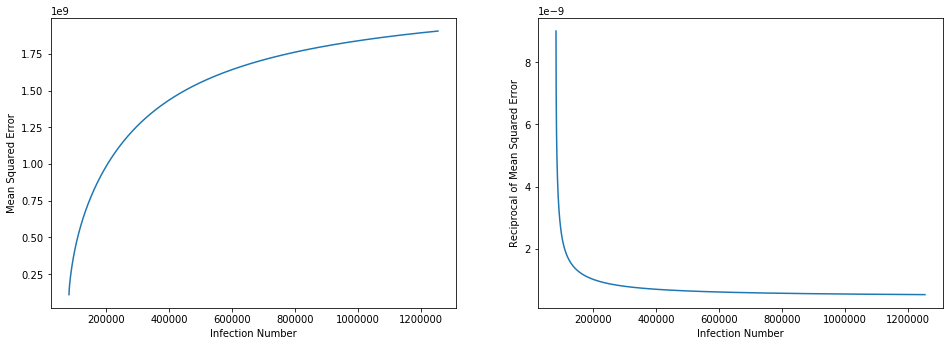

In [4]:
# X = mkX(x)
kL = (y[-1] +1) * np.linspace(1, 15, 10000)
MSEL = []
IMSEL = []

for k in kL:
    lr2 = LinearRegression()
    lr2.fit(x.reshape(-1, 1), np.log(k / y.reshape(-1, 1) - 1 ))

    prd2 = lr2.predict(xx.reshape(-1, 1))
    yy2 = k /(np.e**prd2 +1)
    MSE = mean_squared_error(y.reshape(-1,1), k / (np.e**(lr2.predict(x.reshape(-1,1)))+1 ))

    MSEL.append(MSE)
    IMSEL.append(1/MSE)
    
plt.figure(figsize=(16, 8/1.5))
plt.subplot(1,2,1)
plt.ylabel("Mean Squared Error")
plt.xlabel("Infection Number")
# plt.yscale("log")
plt.plot(kL, MSEL)

plt.subplot(1,2,2)
plt.ylabel("Reciprocal of Mean Squared Error")
plt.xlabel("Infection Number")
# plt.yscale("log")
plt.plot(kL, IMSEL)

plt.show()

In [5]:
minV = min(MSEL)

print(kL[MSEL.index(minV)], kL[MSEL.index(minV) -1 ], kL[MSEL.index(minV) +1] )

k = kL[MSEL.index(minV)]
lr2 = LinearRegression()
lr2.fit(x.reshape(-1, 1), np.log(k / y.reshape(-1, 1) - 1 ))

prd2 = lr2.predict(xx.reshape(-1, 1))
yy2 = k /(np.e**prd2 +1)
MSE = mean_squared_error(y.reshape(-1,1), k / (np.e**(lr2.predict(x.reshape(-1,1)))+1 ))

MSEL.append(MSE)


83535.0 1253025.0 83651.9606960696


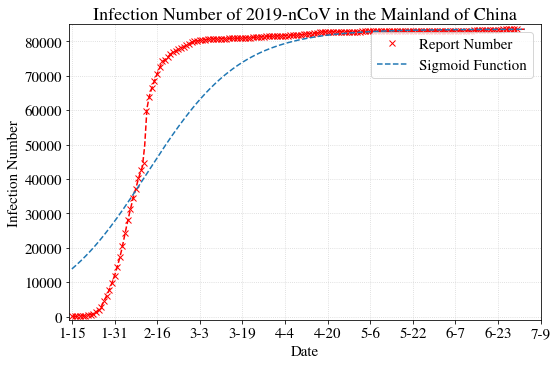

In [6]:
xtk = [0, 16, 32, 48, 64, 80, 96, 112, 128, 144, 160, 176]
xtkshow = ['1-15', '1-31', '2-16', '3-3', '3-19', '4-4','4-20', '5-6','5-22','6-7','6-23','7-9']

matplotlib.rcParams.update({'font.size': 15, 'font.family': 'STIXGeneral', 'mathtext.fontset': 'stix'})

plt.figure(figsize=(8, 8/1.5))
plt.plot(x, y, 'x', label = 'Report Number', c = 'red')
plt.plot(xx, yy,'--', c = 'red')
# plt.plot(xx, yy1,'--', label = 'Exponential Function')
plt.plot(xx, yy2,'--', label = 'Sigmoid Function')

endp = 15
plt.xlim(-1, endp)
plt.xticks(xtk, xtkshow)
plt.xlabel("Date")

# plt.yscale('log')
plt.ylim(-1000, 85000)

plt.ylabel("Infection Number")
plt.title("Infection Number of 2019-nCoV in the Mainland of China")
plt.legend()

plt.grid(linestyle = "dotted", color = "#d3d3d3" , which="both")
plt.tight_layout()
plt.show()

In [7]:
#下一日预测
prd3 = lr2.predict([[len(y)]])
yy3 = k /(np.e**prd3 +1)
yy3

array([[83506.36866969]])

In [8]:
#下一日新增
yy3 - y[-1]

array([[-27.63133031]])

In [9]:
print (kL[MSEL.index(minV)], lr2.coef_, lr2.intercept_)

83535.0 [[-0.05710864]] [1.61607512]
